## Assignment 5 Question 3
* Jesse Aguirre
* jaa369,11273119
* Professor Wahid
* CME 466

### Answer
[[108 111 600 200]
 [118 272 600 200]
 [ 91 428 600 200]
 [122 580 600 200]]
Found 4 plates.

In [16]:
import os
import sys
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [17]:
def display_image(image, title):
    plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()
def save_image(image, path):
    cv.imwrite(path, image)
    
# Read the image
img_path = os.path.join('..', 'data', 'rus_plate.jpg')
img = cv.imread(img_path)
if img is None:
    sys.exit("Could not read the image.")
    



In [18]:
# Load HaaR cascade
plate_cascade = cv.CascadeClassifier()

if not plate_cascade.load(cv.samples.findFile('../data/haarcascade_russian_plate_number.xml')):
    sys.exit("Could not load the cascade classifier.")


In [19]:
def detect_plate(img):
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    gray = cv.equalizeHist(gray)
    
    plates = plate_cascade.detectMultiScale(gray, scaleFactor=1.001, minNeighbors=20, minSize=(300, 200), flags=cv.CASCADE_SCALE_IMAGE, maxSize=(600, 250))
    print (plates)
    print (f"Found {len(plates)} plates.")
    for (x, y, w, h) in plates:
        center = (x + w//2, y + h//2)
        img = cv.ellipse(img, center, (w//2, h//2), 0, 0, 360, (255, 0, 255), 4)
        number_plate = img[y:y+h, x:x+w]
        display_image(number_plate, "Number Plate")
    display_image(img, "Detected Plates")
    save_image(img, "../submission/detected_plates.jpg")
    
    

# Run the code

[[108 111 600 200]
 [118 272 600 200]
 [ 91 428 600 200]
 [122 580 600 200]]
Found 4 plates.


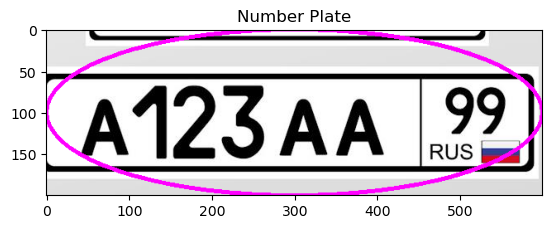

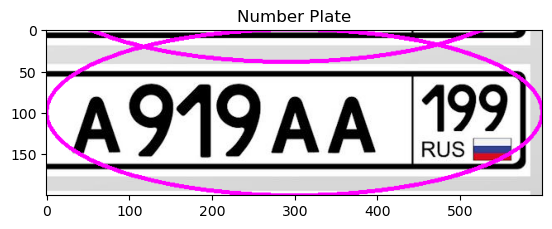

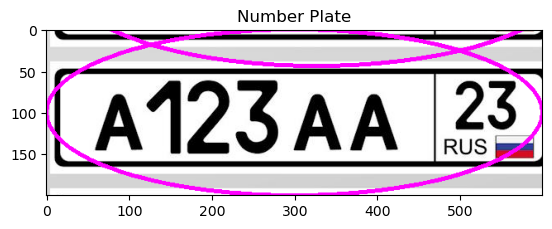

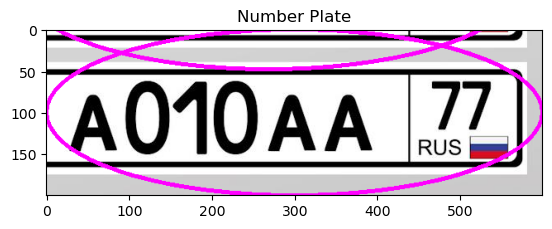

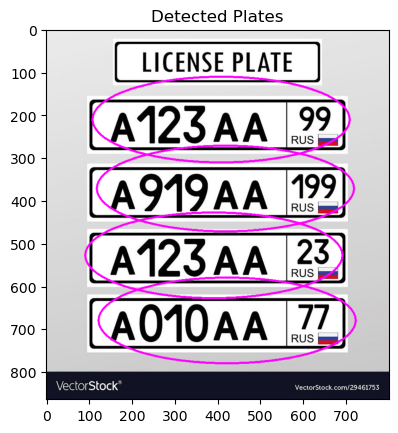

In [20]:
detect_plate(img)